# 205. Исследование магнитного поля цилиндрической катушки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Данные измерений напряжённости магнитного поля на оси катушки и у её торца для различных сердечников

In [2]:
data = pd.DataFrame({
    'ac_wood': pd.read_csv('ac-wood.tsv', sep='\t', squeeze=True) / 1000,
    'dc_wood_right': pd.read_csv('dc-wood-right.tsv', sep='\t', squeeze=True),
    'dc_wood_left': pd.read_csv('dc-wood-left.tsv', sep='\t', squeeze=True),
    'ac_steel': pd.read_csv('ac-steel.tsv', sep='\t', squeeze=True) / 1000,
    'dc_steel_right': pd.read_csv('dc-steel-right.tsv', sep='\t', squeeze=True),
    'dc_steel_left': pd.read_csv('dc-steel-left.tsv', sep='\t', squeeze=True),
    'ac_aluminium': pd.read_csv('ac-aluminium.tsv', sep='\t', squeeze=True) / 1000,
    'dc_aluminium_right': pd.read_csv('dc-aluminium-right.tsv', sep='\t', squeeze=True),
    'dc_aluminium_left': pd.read_csv('dc-aluminium-left.tsv', sep='\t', squeeze=True)
})
# Единица измерения: V
data

,ac_wood,dc_wood_right,dc_wood_left,ac_steel,dc_steel_right,dc_steel_left,ac_aluminium,dc_aluminium_right,dc_aluminium_left
0,0.0673,2.410,2.232,0.0271,2.650,2.108,0.04750,2.408,2.260
1,0.0939,2.430,2.208,0.0022,2.348,2.310,0.06910,2.430,2.231
2,0.1220,2.560,2.275,0.0012,2.336,2.330,0.09000,2.463,2.201
3,0.1484,2.500,2.148,0.0012,2.337,2.330,0.11390,2.495,2.166
4,0.1679,2.530,2.128,0.0010,2.336,2.330,0.13120,2.526,2.167
5,0.1832,2.540,2.114,0.0010,2.336,2.330,0.14330,2.544,2.129
6,0.1946,2.560,2.106,0.0010,2.336,2.330,0.15190,2.563,2.116
7,0.2017,2.570,2.100,0.0010,2.337,2.330,0.15580,2.570,2.105
8,0.2050,2.570,2.096,0.0010,2.337,2.330,0.15670,2.573,2.098
9,0.2073,2.577,2.093,0.0010,2.337,2.330,0.15800,2.575,2.094


## 2. Зависимость $B=f(x)$

In [5]:
def B(x, i, W, l, R, mu0):
    x /= 100
    return mu0*i*W/(2*l)*((l-x)/(R**2+(l-x)**2)**0.5 + x/(R**2 + x**2)**0.5)

### AC

In [3]:
from functools import partial

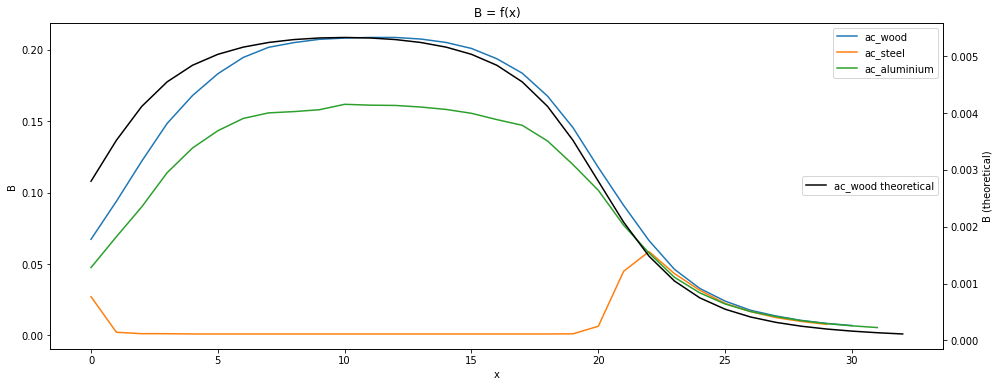

In [16]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.plot('ac_wood', data=data)
ax.plot('ac_steel', data=data)
ax.plot('ac_aluminium', data=data)
# ax.plot(list(map(partial(B, i=1, R=38e-3, W=3e3, l=32e-2, mu0=0.38e-6), range(1,32))), label='ac_wood theoretical')
# plt.plot(list(map(partial(B, i=1, R=38e-3, W=3e3, l=32e-2, mu0=0.38e-6), data.index)), label='ac_wood theoretical')
ax.legend()
ax.set_title('B = f(x)')
ax.set_xlabel('x')
ax.set_ylabel('B')

ax1 = ax.twinx()
ax1.plot(list(map(partial(B, i=1, R=38e-3, W=3e3, l=20e-2, mu0=0.38e-6), data.index)), label='ac_wood theoretical', color='black')
ax1.legend(loc='center right')
ax1.set_ylabel('B (theoretical)')

plt.show()

### DC, right

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.plot('dc_wood_right', data=data)
ax.plot('dc_steel_right', data=data)
ax.plot('dc_aluminium_right', data=data)
# ax.plot(list(map(B, data.index)), label='ac_wood theoretical')
ax.legend()
ax.set_title('B = f(x)')
ax.set_xlabel('x')
ax.set_ylabel('B')
plt.show()

#### Теоретический расчёт
Не соответствует ожидаемому

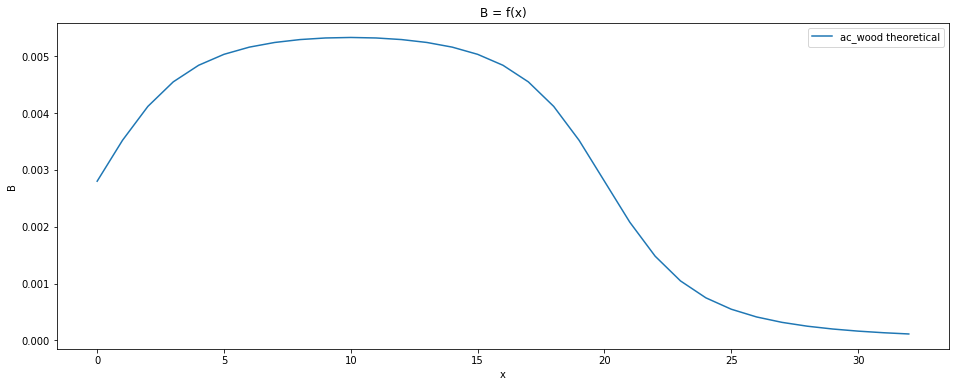

In [6]:
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.plot(list(map(partial(B, i=1, R=38e-3, W=3e3, l=20e-2, mu0=0.38e-6), data.index)), label='ac_wood theoretical')
ax.legend()
ax.set_title('B = f(x)')
ax.set_xlabel('x')
ax.set_ylabel('B')
plt.show()

### DC, left

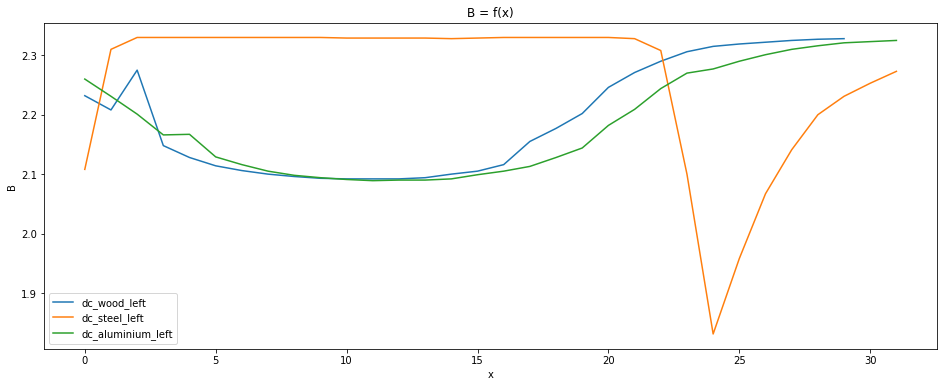

In [7]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.plot('dc_wood_left', data=data)
ax.plot('dc_steel_left', data=data)
ax.plot('dc_aluminium_left', data=data)
# ax.plot(list(map(B, data.index)), label='ac_wood theoretical')
ax.legend()
ax.set_title('B = f(x)')
ax.set_xlabel('x')
ax.set_ylabel('B')
plt.show()